Training model... please wait.
Finished! Final w: [3645.26900064 1966.63205344 9613.8847355 ], Final b: 13,270.42

--- Prediction ---
Predicted Cost for 45yo Smoker: $33,504.95


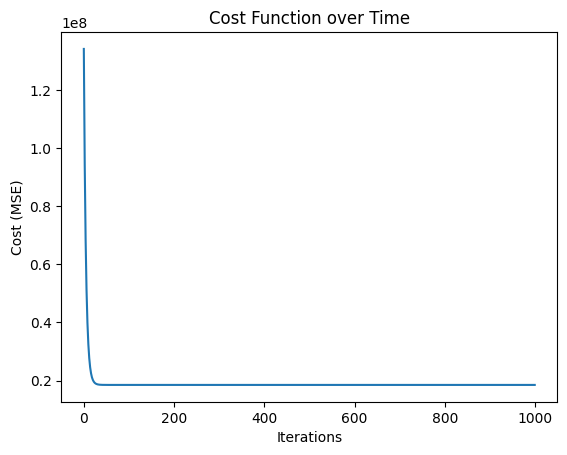

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD DATA
df = pd.read_csv('insurance.xls')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

X_train = df[['age', 'bmi', 'smoker']].values
y_train = df['charges'].values

# 2. FEATURE SCALING (Z-score Normalization)
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_norm = (X_train - mu) / sigma

# 3. DEFINE THE MATH (From your Course Labs)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    return cost / (2 * m)

def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    return dj_dw / m, dj_db / m

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000: J_history.append(compute_cost(X, y, w, b))
    return w, b, J_history

# 4. TRAIN THE MODEL
print("Training model... please wait.")
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0.
iterations = 1000
alpha = 0.1

w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b, alpha, iterations)
print(f"Finished! Final w: {w_final}, Final b: {b_final:,.2f}")

# 5. PREDICT FOR A MADE-UP PERSON
# Person: 45 years old, 30 BMI, Smoker
x_house = np.array([45, 30, 1])
x_house_norm = (x_house - mu) / sigma
prediction = np.dot(x_house_norm, w_final) + b_final

print(f"\n--- Prediction ---")
print(f"Predicted Cost for 45yo Smoker: ${prediction:,.2f}")

# 6. PLOT THE COST (For your LinkedIn post!)
plt.plot(J_hist)
plt.title("Cost Function over Time")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()